In [16]:
import numpy as np
from PIL import Image

In [20]:
def shade_color(rgb_color, factor):
    r = np.uint8(rgb_color[0] * (1.0 - factor))
    g = np.uint8(rgb_color[1] * (1.0 - factor))
    b = np.uint8(rgb_color[2] * (1.0 - factor))
    return [r, g, b]

In [89]:
def get_proper_color(poly, poly_der, roots, start, colors, max_iters, eps=0.000001):
    
    found_iter = max_iters
    result_color = None
    
    for i in range(max_iters):
        diffs = [(np.abs(root - start), color) for (root, color) in zip(roots, colors)]
        reached = list(filter(lambda x : x[0] < eps, diffs))
        
        # one of the roots has been reached
        if len(reached) > 0:
            found_iter = i
            result_color = reached[0][1]
            break
        
        # derivative is close to zero - the point does not converge to any root
        if np.abs(poly_der(start)) < eps:
            break
            
        start = start - poly(start)/poly_der(start)
        
    if result_color is None:
        return [0, 0, 0]
        
    factor = found_iter / max_iters
    return shade_color(result_color, factor)

In [26]:
shade_color([123, 15, 56], 1)

[0, 0, 0]

In [69]:
poly = np.poly1d([1., 0., 2., 0.])
roots = poly.roots
poly_der = np.poly1d(np.polyder(poly.coef))
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]

In [75]:
poly_der


poly1d([3., 0., 2.])

In [81]:
a = np.ndarray(shape=(3, 2))
a

array([[6.93934411e-310, 6.93934411e-310],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000]])

In [111]:
def draw_newton_fractal(poly, poly_der, roots, colors, max_iters, xrange, yrange, im_size, eps=0.000001):
    
    d_width = xrange[1] - xrange[0]
    d_height = yrange[1] - yrange[0]
    fractal = np.ndarray(shape=(im_size[1], im_size[0], 3), dtype=np.uint8)
    
    for row in range(im_size[1]):
        for col in range(im_size[0]):
            x = (col / im_size[0]) * d_width + xrange[0]
            y = (row / im_size[1]) * d_width + xrange[0]
            start = complex(x, y)
            color = get_proper_color(poly, poly_der, roots, start, colors, max_iters, eps)
            fractal[row][col] = color
            
    return fractal

In [97]:
im_arr = draw_newton_fractal(poly, poly_der, roots, colors, 10, (-2., 2.), (-2., 2.), (500, 500))

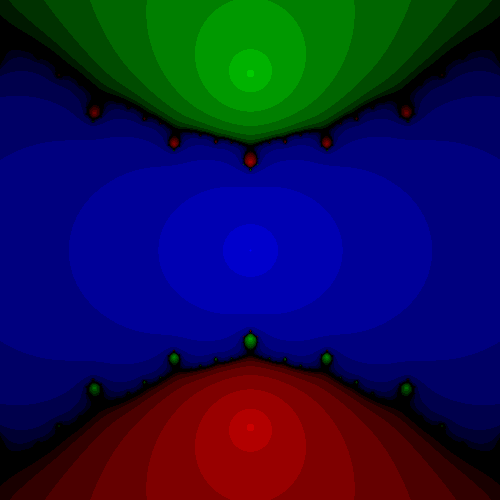

In [99]:
Image.fromarray(im_arr)

In [104]:
# 6x^5 - 4x^3 + x^2 - 12x - 60 = 0
poly = np.poly1d([6., 0., -4., 1., -12., -60.])
roots = poly.roots
poly_der = np.poly1d(np.polyder(poly.coef))
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255]]

In [112]:
im_arr = draw_newton_fractal(poly, poly_der, roots, colors, 15, (-3., 3.), (-3., 3.), (500, 500), eps=0.000000001)

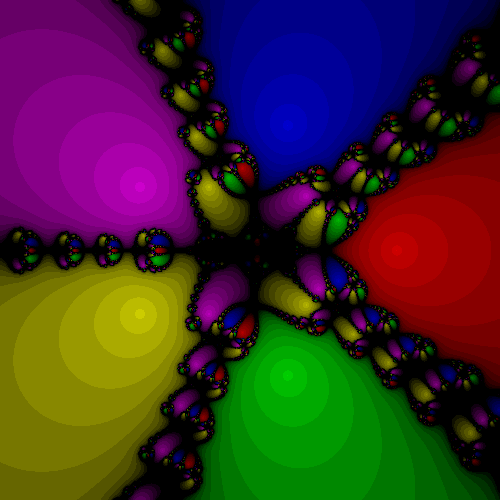

In [114]:
im = Image.fromarray(im_arr)
im.save('fractal5.png')
im